# SymPy

## Overview

Unlike numerical libraries that deal with concrete values, [SymPy](https://www.sympy.org/en/index.html)  focuses on manipulating mathematical symbols and expressions directly.

SymPy provides [a wide range of functionalities](https://www.sympy.org/en/features.html) including 

- Symbolic Expression
- Equation Solving
- Simplification
- Calculus
- Matrices
- Discrete Math, etc.

Unlike other popular tools for symbolic computations such as Mathematica it is an open-source library supported by an active community. 

## Getting Started

Let’s first import the library and initialize the printer to print the symbolic output

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d_parametric_line, plot3d
import numpy as np
from sympy.solvers.inequalities import reduce_rational_inequalities

# Enable best printer available
init_printing()

## Symbolic algebra

### Symbols

Before we start manipulating the symbols, let's initialize some symbols to work with

In [2]:
x, y, z = symbols('x y z')

### Expressions

We can now use these symbols `x`, `y`, and `z` to build expressions and equations

Let's build a simple expression first

In [3]:
expr = (x + y) ** 2
expr

We can expand this expression with the `expand` function

In [4]:
expand_expr = expand(expr)
expand_expr

and factorize it back to the factored form with the `factor` function

In [5]:
factor(expand_expr)

We can solve this expression

In [6]:
solve(expr)

Note this is equivalent to solving the equation

$$
(x + y)^2 = 0 
$$

Another way to solve equation is to use `solveset`.

`solveset` allows users to define the domain of `x` the evaluation and output a set as solution

In [7]:
solveset(expr, x, domain=S.Naturals)

```{note}
[Solvers](https://docs.sympy.org/latest/modules/solvers/index.html) are important tools to solve different types of equations. There are more varieties of solvers available in SymPy
```

### Equations

SymPy provides several functions to manipulate equations.

Let's develop an equation with the expression we defined before

In [8]:
eq = Eq(expr, 0)
eq

Solving this expression with respect to x gives the same output as solving the expression directly

In [9]:
solve(eq, x)

SymPy can easily handle equations with multiple solutions

In [10]:
eq = Eq(expr, 1)
solve(eq, x)

`solve` function can also combine multiple equations together and solve a system of equations

In [11]:
eq2 = Eq(x, y)
eq2

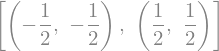

In [12]:
solve([eq, eq2], [x, y])

We can also solve for y by simply substituting the $x$ with $y$

In [13]:
expr_sub = expr.subs(x, y)

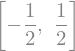

In [14]:
solve(Eq(expr_sub, 1))

Let's we create another equation with symbol `x` and functions `sin`, `cos`, and `tan` using the `Eq` function

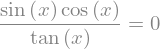

In [15]:
# Create an equation
eq = Eq(cos(x) / (tan(x)/sin(x)), 0)
eq

Now we simplify this equation using the `simplify` function

In [16]:
# Simplify an expression
simplified_expr = simplify(eq)
simplified_expr

We can solve equations using the `solve` function in SymPy

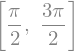

In [17]:
# Solve the equation
sol = solve(eq, x)
sol

SymPy can also handle more complex equations involving trignomotry and complex number.

We demonstrate this using [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula)

In [18]:
# 'I' represents imaginary number i 
euler = cos(x) + I*sin(x)
euler

In [19]:
simplify(euler)

#### Example: fixed point computation

One version of Solow-Swan growth dynamics is 

$$
k_{t+1}=s f\left(k_t\right)+(1-\delta) k_t, \quad t=0,1, \ldots
$$

where $k_t$ is the capital stock, $f$ is a production function, $\delta$ is a rate of depreciation.

With $f(k) = Ak^a$, one can show the unique fixed point of the dynamics is 

$$
k^*:=\left(\frac{s A}{\delta}\right)^{1 /(1-\alpha)}
$$ 

This can be easily computed in SymPy

In [20]:
A, s, k, α, δ = symbols('A s k α δ')

In [21]:
# Define Solow-Swan growth dynamics
solow = Eq(s*A*k**α + (1 - δ) * k, k)

In [22]:
solve(solow, k)

#### Inequalities and logic

SymPy also allows users to define inequalities and set operators and provides a wide range of [operations](https://docs.sympy.org/latest/modules/solvers/inequalities.html).

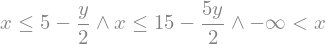

In [23]:
reduce_inequalities([2*x + 5*y <= 30, 4*x + 2*y <= 20], [x])

In [24]:
And(2*x + 5*y <= 30, x > 0)

### Series

Series are widely used in economics and statistics from asset pricing to expectation of discrete random variables.

We can construct a simple series of summations using `Sum` function

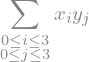

In [25]:
x, y, i, j = symbols("x y i j")
sum_xy = Sum(Indexed('x',i) * Indexed('y', j), 
        (i, 0, 3),
        (j, 0, 3))
sum_xy

To evaluate the sum, we can `lamdify` the formula.

The lamdified expression can take inputs and compute the result

In [26]:
sum_xy = lambdify([x, y], sum_xy)
grid = np.arange(0, 4, 1)
sum_xy(grid, grid)

36

#### Example: bank deposits

Imagine a bank with $D_0$ as the deposit at time $t$, it loans $(1-r)$ of its deposits and keeps a fraction 
$r$ as cash reserves, one can calculate the deposite at time with

$$
\sum_{i=0}^\infty (1-r)^i D_0
$$

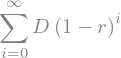

In [27]:
r, D = symbols('r D')

Dt = Sum('(1 - r)^i * D', (i, 0, oo))
Dt

We can call `doit` method to evaluate the series

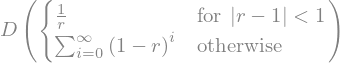

In [28]:
Dt.doit()

Simplifying the expression above gives

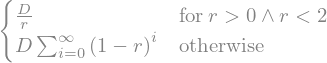

In [29]:
simplify(Dt.doit())

This is consistent with the solution we provided in our lecture on [geometric series](https://python.quantecon.org/geom_series.html#example-the-money-multiplier-in-fractional-reserve-banking).

## Symbolic Calculus

SymPy allows us to perform various calculus operations such as differentiation and integration.


### Limits

We can compute limits for a given function using the `limit` function

In [30]:
# Define a function
f = x ** 2 / (x - 1)

# Compute the limit
lim = limit(f, x, 0)
lim

### Derivatives

We can differentiate any SymPy expression using `diff(func, var)`

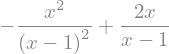

In [31]:
# Differentiate a function
df = diff(f, x)
df

### Integrals

We can compute definite and indefinite integrals using `integrate` function

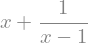

In [32]:
# Calculate the indefinite integral
indef_int = integrate(df, x)
indef_int

Let's use this function to compute the moment generating function of [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with the probability density function:

$$
f(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$

In [33]:
λ, x = symbols('lambda x')
pdf = λ * exp(-λ*x)
pdf

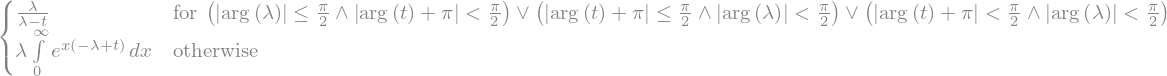

In [34]:
t = symbols('t')
moment_n = integrate(exp(t * x) * pdf, (x, 0, oo))
simplify(moment_n)

Using `integrate` function, we can derive the cumulative density function of the exponential distribution with $\lambda = $

In [35]:
lamda_pdf = pdf.subs(λ, 1/2)
lamda_pdf

In [36]:
integrate(lamda_pdf, (x, 0, 4))

## Plotting

SymPy provides a powerful plotting feature. 

First we plot a simple function using the `plot` function

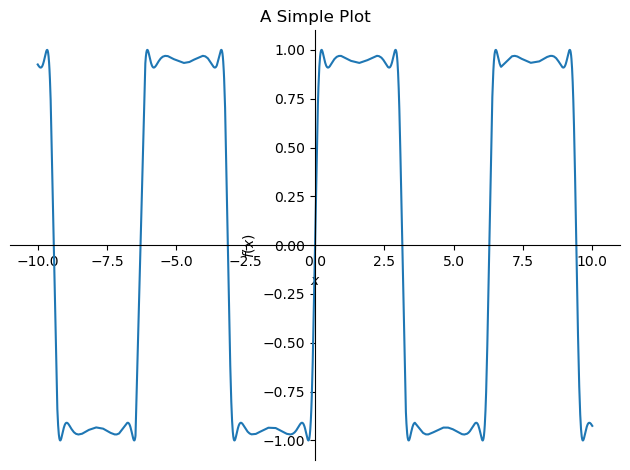

In [37]:
f = sin(2 * sin(2 * sin(2 * sin(x))))
p = plot(f, (x, -10, 10), show=False)
p.title = 'A Simple Plot'
p.show()

Similar to Matplotlib, SymPy provides interface to customize the graph

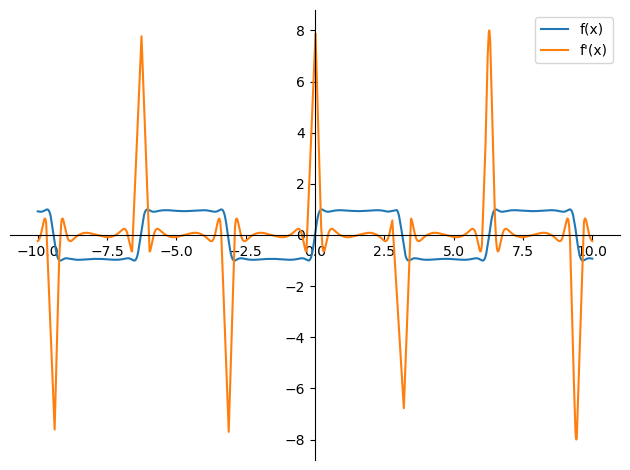

In [38]:
plot_f = plot(f, (x, -10, 10), 
              xlabel='', ylabel='', legend = True, show = False)
plot_f[0].label = 'f(x)'
df = diff(f)
plot_df = plot(df, (x, -10, 10), legend = True, show = False)
plot_df[0].label = 'f\'(x)'
plot_f.append(plot_df[0])
plot_f.show()

It also supports plotting implicit functions and visualizing inequalities

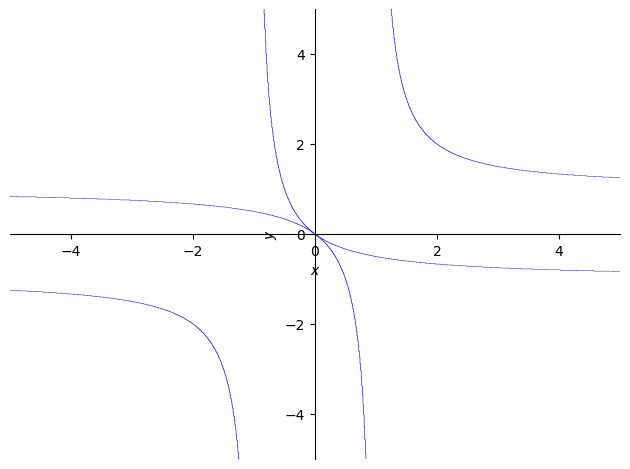

In [39]:
p = plot_implicit(Eq((1/x + 1/y)**2, 1))

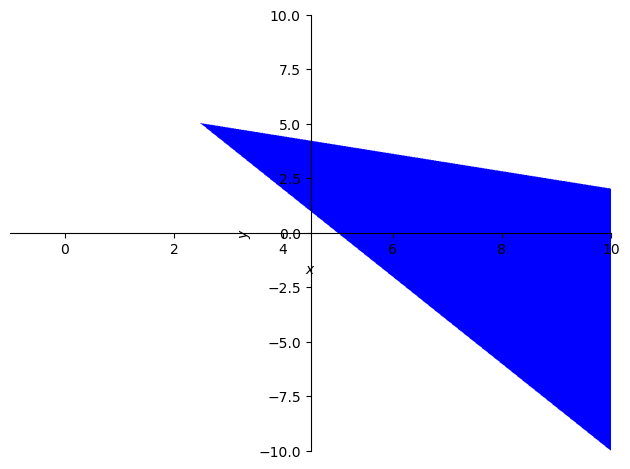

In [40]:
p = plot_implicit(And(2*x + 5*y <= 30, 4*x + 2*y >= 20), (x, -1, 10), (y, -10, 10))

It also supports visualizations in three-dimentional space

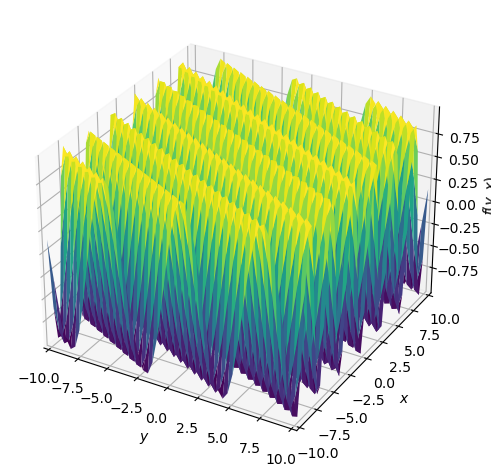

In [41]:
p = plot3d(cos(2*x + y))

## Applications
In this section, we apply SymPy to an economic model that explores the wage gap between college and high school graduates. 

We'll use symbolic computation to define, manipulate, and solve equations in the model, thereby deriving insights that would be challenging to obtain through numerical methods alone. 

Let's get started.


### Defining the Symbols

The first step in symbolic computation is to define the symbols that represent the variables in our equations. In our model, we have the following variables:

 * $R$ The gross rate of return on a one-period bond

 * $t = 0, 1, 2, \ldots T$ Denote the years that a person either works or attends college
 
 * $T$ denote the last period that a person  works
 
 * $w$ The wage of a high school graduate
 
 * $g$ The growth rate of wages

 * $D$ The upfront monetary costs of going to college
 
 * $\phi$ The wage gap, defined as the ratio of the wage of a college graduate to the wage of a high school graduate
 
 Let's define these symbols using sympy

In [42]:
# Define the symbols
w, R, g, D, phi = symbols('w R g D phi')

### Defining the Present Value Equations
We calculate the present value of the earnings of a high school graduate and a college graduate. For a high school graduate, we sum the discounted wages from year 1 to $T = 4$. For a college graduate, we sum the discounted wages from year 5 to $T = 4$, considering the cost of college $D$ paid upfront

$$
PV_{\text{{highschool}}} = \frac{w}{R} + \frac{w*(1 + g)}{R^2} + \frac{w*(1 + g)^2}{R^3} + \frac{w*(1 + g)^3}{R^4}
$$

$$
PV_{\text{{college}}} = D + \frac{\phi * w * (1 + g)^4}{R} + \frac{\phi * w * (1 + g)^5}{R^2} + \frac{\phi * w * (1 + g)^6}{R^3} + \frac{\phi * w * (1 + g)^7}{R^4}
$$

In [43]:
# Define the present value equations
PV_highschool = w/R + w*(1 + g)/R**2 + w*(1 + g)**2/R**3 + w*(1 + g)**3/R**4
PV_college = D + phi*w*(1 + g)**4/R + phi*w*(1 + g)**5 / \
    R**2 + phi*w*(1 + g)**6/R**3 + phi*w*(1 + g)**7/R**4

### Defining the Indifference Equation
The indifference equation represents the condition that a worker is indifferent between going to college or not. This is given by the equation $PV_h$ = $PV_c$

In [44]:
# Define the indifference equation
indifference_eq = Eq(PV_highschool, PV_college)

We can now solve the indifference equation for the wage gap $\phi$

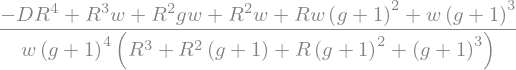

In [45]:
# Solve for phi
solution = solve(indifference_eq, phi)

# Simplify the solution
solution = simplify(solution[0])
solution

To compute a numerical value for $\phi$, we replace symbols $w$, $R$, $g$, and $D$ with specific numbers. 

Let's take $w = 1$, $R = 1.05$, $g = 0.02$, and $D = 0.5$. With these values, we can substitute them into the equation and find a specific value for $\phi$.

In [46]:
# Substitute specific values
solution_num = solution.subs({w: 1, R: 1.05, g: 0.02, D: 0.5})
solution_num

The wage of a college graduate is approximately 0.797 times the wage of a high school graduate.

```{exercise}
:label: sympy_ex1

L'Hôpital's rule states that for two functions $f(x)$ and $g(x)$, if $\lim_{x \to a} f(x) = \lim_{x \to a} g(x) = 0$ or $\pm \infty$, then

$$
\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)}
$$

Use SymPy to verify L'Hôpital's rule for the following functions

$$
f(x) = \frac{y^x - 1}{x}
$$
```

```{solution-start} sympy_ex1
:class: dropdown
```

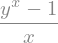

In [47]:
f_upper = y**x - 1
f_lower = x
f = f_upper/f_lower
f

In [48]:
lim = limit(f, x, 0)
lim

In [49]:
lim = limit(diff(f_upper, x)/
            diff(f_lower, x), x, 0)
lim

```{solution-end}
```

```{exercise}
:label: sympy_ex2

Maximum likelihood estimation (MLE) is a method to estimate the parameters of a statistical model. 

It usually involves maximizing a log likelihood function and solving the first order condition.

In this exercise, we'll use SymPy to compute the MLE of a binomial distribution.
```

```{solution-start} sympy_ex2
:class: dropdown
```

First, we define the binomial distribution

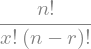

In [50]:
n, x, θ = symbols('n x, θ')

binomial_factor = (factorial(n))/ (factorial(x) *factorial(n-r))
binomial_factor

In [51]:
bino_dist = binomial_factor * ((θ**x)*(1-θ)**(n-x))
bino_dist

Now we compute the log-likelihood function and solve for the result

In [52]:
log_bino_dist = log(bino_dist)

In [53]:
log_bino_diff = simplify(diff(log_bino_dist, θ))
log_bino_diff

In [54]:
solve(Eq(log_bino_diff, 0), θ)

```{solution-end}
```

```{exercise}
:label: sympy_ex3

Imagine a pure exchange economy with two consumers ($a$ and $b$)and two goods ($x$ and $y$).

Assume that the utility functions of the consumers are given by

$$
u_a(x, y) = x^{\alpha} y^{1-\alpha}
$$

$$
u_b(x, y) = (1 - x)^{\beta} (1 - y)^{1-\beta}
$$

where $\alpha, \beta \in (0, 1)$.

Compute the Pareto optimal allocation of the economy with $\alpha = \beta = 0.5$ using SymPy
```

```{solution-start} sympy_ex3
:class: dropdown
```

In [55]:
x, y, α, β = symbols('x, y, α, β')
a = x**α * y**(1-α)
b = (1 - x)**β * (1 - y)**(1 - β)

In [56]:
a

In [57]:
b

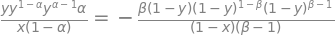

In [58]:
pareto = Eq(diff(a, x)/diff(a, y), diff(b, x)/diff(b, y))
pareto

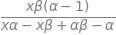

In [59]:
sol = solve(pareto, y)[0]
sol

In [60]:
sol.subs({α: 0.5, β: 0.5})

```{solution-end}
```